In [1]:
import pandas as pd

import foggy_statslib.core as fc
import foggy_statslib.fin as ff

/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [6]:
# longest history
ccy = "USA"

In [19]:
_xr_mkt = pd.read_excel(
    "data/aqr_BAB_r.xlsx",
    sheet_name="MKT",
    skiprows=18,
    index_col="DATE",
    parse_dates=True,
)[ccy]
_xr_mkt.head()

DATE
1926-07-31    0.028335
1926-08-31    0.026245
1926-09-30    0.003287
1926-10-31   -0.031103
1926-11-30    0.024357
Name: USA, dtype: float64

In [20]:
_xr_bab = pd.read_excel(
    "data/aqr_BAB_r.xlsx",
    sheet_name="BAB Factors",
    skiprows=18,
    index_col="DATE",
    parse_dates=True,
)[ccy]
_xr_bab.head()

DATE
1930-12-31   -0.000558
1931-01-31   -0.022446
1931-02-28   -0.077423
1931-03-31    0.029235
1931-04-30   -0.012986
Name: USA, dtype: float64

In [34]:
xr = pd.DataFrame(
    {
        "MKT": _xr_mkt,
        "BAB": _xr_bab,
    }
)
# discount in-sample
xr.loc[:"2012", "BAB"] = xr.loc[:"2012", "BAB"] - xr.loc[:"2012", "BAB"].mean() / 2

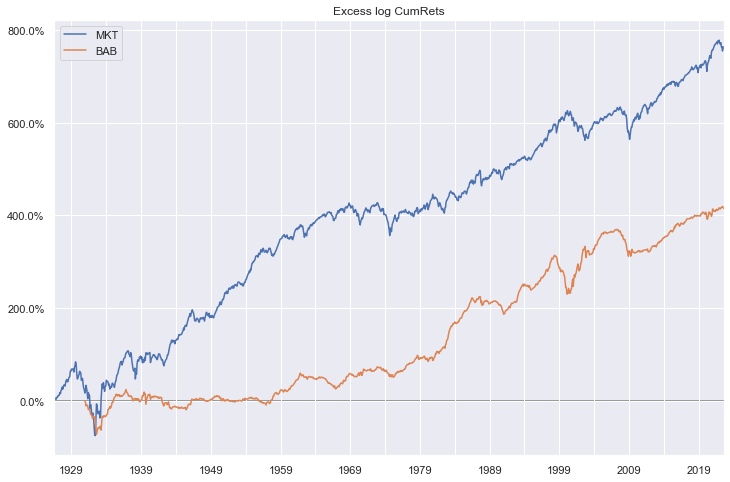

/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/sparshsah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


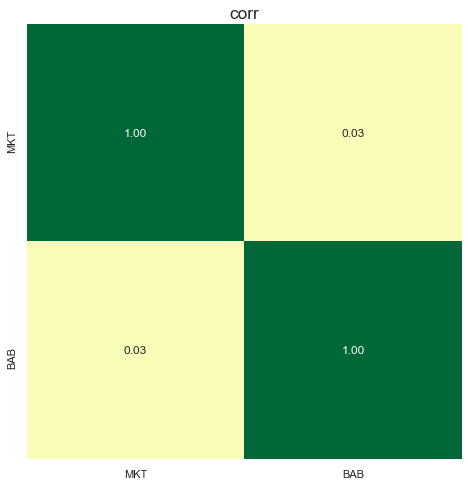

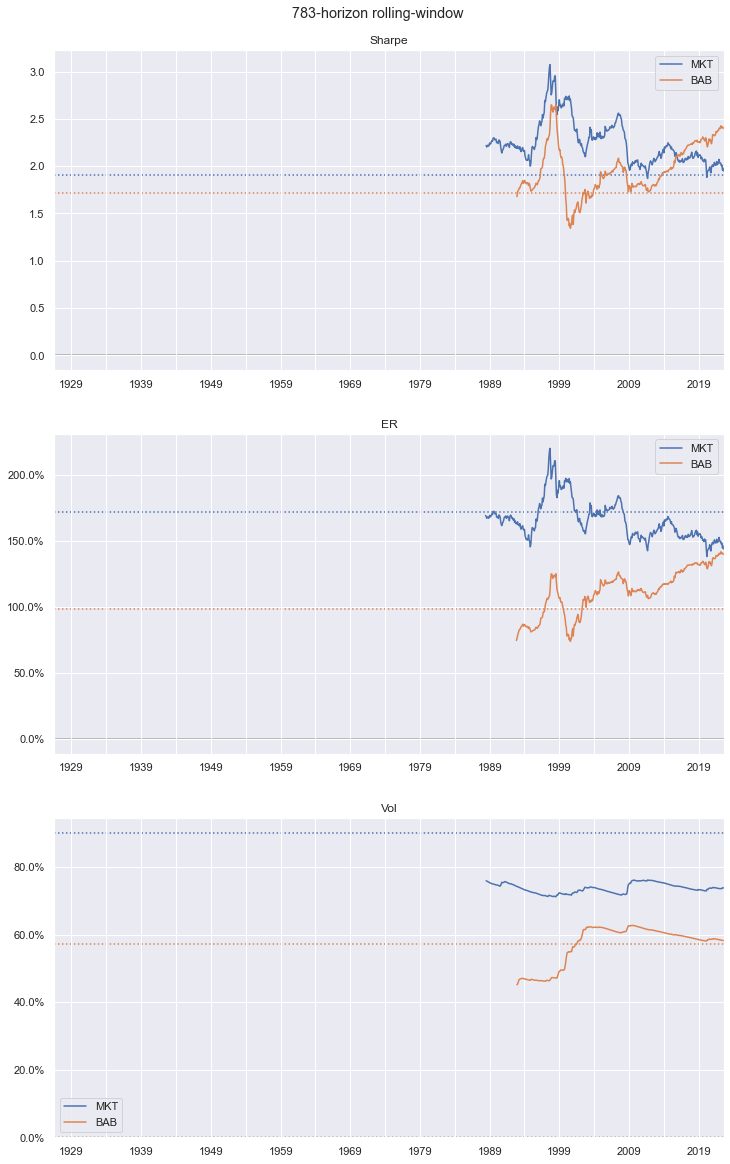

    Sharpe t-stat      ER     Vol Frac valid obs Total valid obs Total obs  \
MKT   1.96   4.03  1.7449  0.8888            1.0            1101      1101   
BAB   1.72   3.53  0.9842  0.5732            1.0            1101      1101   

     First obs First valid obs Last valid obs   Last obs  
MKT 1930-12-31      1930-12-31     2022-08-31 2022-08-31  
BAB 1930-12-31      1930-12-31     2022-08-31 2022-08-31  


In [35]:
ff.chart_r(xr, title="Excess")